### INTRODUCCIÓN A LA ESTADÍSTICA - CORRELACIÓN

In [114]:
# Importamos las librerías a emplear
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Temas de Jupyter para fondo negro
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

# Por si no se nos autocompleta el código
%config IPCompleter.greedy=True

In [119]:
# Cargamos el archivo .csv
data = pd.read_csv(r"D:\Curso-Jupyter-Notebook\GitHub\python-ml-course\datasets\ads\Advertising.csv")
data.head() # Visualizamos los primeros 5 datos

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [116]:
len(data) # Tamaño del dataframe

200

#### Coeficiente de correlación de Pearson ¿Qué tan buena es la relación entre variables?

In [117]:
def corr_pearson(df, var1, var2):
    # Numerador
    df["corrn"] = (data[var1] - np.mean(data[var1]))*(data[var2] - np.mean(data[var2]))

    # Denominador
    data["corrd1"] = (data[var1] - np.mean(data[var1]))**2
    data["corrd2"] = (data[var2] - np.mean(data[var2]))**2

    # Coeficiente de correlación de Pearson
    r = (sum(data["corrn"]))/(np.sqrt(sum(data["corrd1"]) * sum(data["corrd2"])))
    return r

In [118]:
corr_pearson(data, "TV", "Sales")
# Obtenemos una correlación de 0.78 (valor entre 0.5 y 1)
# Cuanto más se gaste en TV también se aumentarán las ventas.
# El coste de TV es positivo para las ventas

0.782224424861606

In [120]:
# Cargamos nuevamente el archivo .csv
data = pd.read_csv(r"D:\Curso-Jupyter-Notebook\GitHub\python-ml-course\datasets\ads\Advertising.csv")
cols = data.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [121]:
# Hallamos la correlación de Pearson entre todas las variables
for x in cols:
    for y in cols:
        print(x + " - " + y + ": " + str(corr_pearson(data, x, y)))

TV - TV: 1.0
TV - Radio: 0.05480866446583006
TV - Newspaper: 0.056647874965056993
TV - Sales: 0.782224424861606
Radio - TV: 0.05480866446583006
Radio - Radio: 1.0
Radio - Newspaper: 0.35410375076117545
Radio - Sales: 0.576222574571055
Newspaper - TV: 0.056647874965056993
Newspaper - Radio: 0.35410375076117545
Newspaper - Newspaper: 1.0
Newspaper - Sales: 0.22829902637616534
Sales - TV: 0.782224424861606
Sales - Radio: 0.576222574571055
Sales - Newspaper: 0.22829902637616534
Sales - Sales: 1.0


Text(0.5, 1.0, 'Publicidad en TV vs ventas totales')

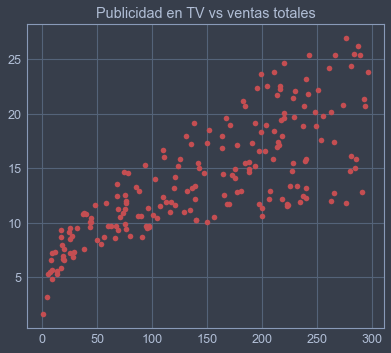

In [122]:
plt.plot(data["TV"], data["Sales"], "ro")
plt.title("Publicidad en TV vs ventas totales")

Text(0.5, 1.0, 'Publicidad en TV vs ventas totales')

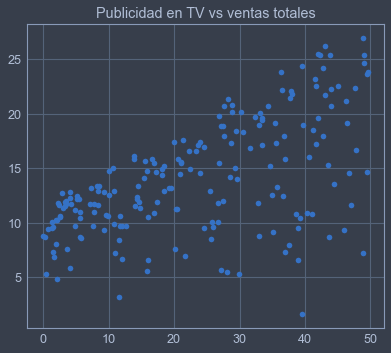

In [123]:
plt.plot(data["Radio"], data["Sales"], "bo")
plt.title("Publicidad en TV vs ventas totales")

Text(0.5, 1.0, 'Publicidad en TV vs ventas totales')

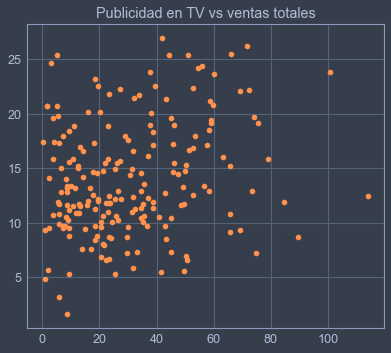

In [124]:
plt.plot(data["Newspaper"], data["Sales"], "yo")
plt.title("Publicidad en TV vs ventas totales")

In [125]:
# Cargamos nuevamente el archivo .csv
data = pd.read_csv(r"D:\Curso-Jupyter-Notebook\GitHub\python-ml-course\datasets\ads\Advertising.csv")
data.corr() # Hallamos la correlación de las variables directamente

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


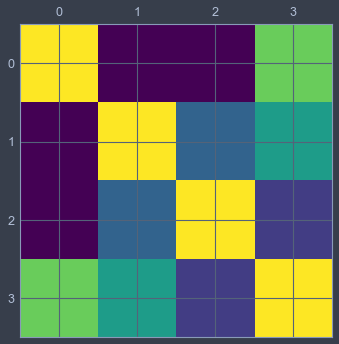

In [126]:
# Visualización de la matriz de correlación
plt.matshow(data.corr())
# Correlación positiva (cerca a 1) -> colores claros
# Correlación negativa (cerca a 0) -> colores oscuros